# Comprehensive Guide to Deep Learning Concepts

This notebook covers essential topics in deep learning, focusing on **Softmax and Cross-Entropy**, **Multiclass Classification**, and **Convolutional Neural Networks (CNNs)**. 
The content is derived from academic resources and aims to provide clear explanations, examples, and code snippets for better understanding.


## Softmax and Cross-Entropy

### Softmax: From Logits to Probabilities

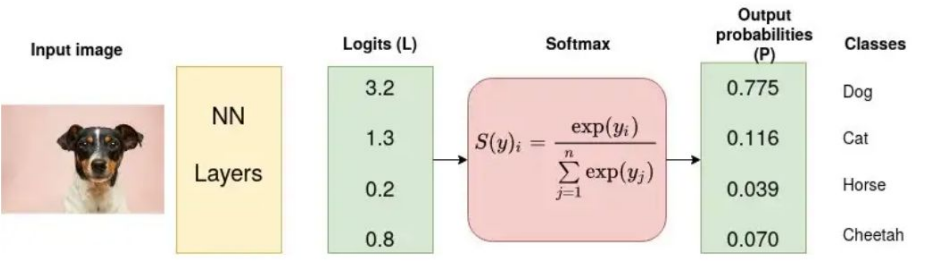

The **softmax function** normalizes a vector of real numbers into a probability distribution. Each component is proportional to the exponential of the input:


$$\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

- **Input**: A vector of logits (can be negative, greater than 1, or not sum to 1).
- **Output**: A probability distribution where:
  - Each component lies in ((0, 1))
  - The components sum to 1.

### Cross-Entropy
The **cross-entropy loss** measures the dissimilarity between two probability distributions: the ground truth \\(y\\) and the predicted probabilities \\(\\hat{y}\\).

For a single sample:
$$L = - \sum_{i=1}^K y_i \log(\hat{y}_i)$$

- **Categorical Cross-Entropy**: Used when labels are one-hot encoded.
- **Sparse Categorical Cross-Entropy**: Used when labels are integer-encoded.

### Implementation Example


In [2]:
import numpy as np

# Example: Softmax function
def softmax(logits):
    exps = np.exp(logits - np.max(logits))  # Stabilizing with max subtraction
    return exps / np.sum(exps, axis=0)

# Example logits and application
logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)
print("Softmax Probabilities:", probabilities)

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-15))  # Adding epsilon to avoid log(0)

# Ground truth and predicted probabilities
y_true = np.array([1, 0, 0])  # One-hot encoded true label
loss = cross_entropy_loss(y_true, probabilities)
print("Cross-Entropy Loss:", loss)


Softmax Probabilities: [0.65900114 0.24243297 0.09856589]
Cross-Entropy Loss: 0.417030016277832


## Convolutional Neural Networks (CNNs)

CNNs are designed to process grid-like data, such as images. They consist of multiple layers that work together to extract features and perform classification.

### Core Components of CNNs

1. **Convolutional Layers**:
   - Apply filters to extract local patterns.
   - Filters "slide" across the input image, performing dot products.

2. **Activation Functions**:
   - Introduce non-linearities (e.g., ReLU).

3. **Pooling Layers**:
   - Reduce spatial dimensions while retaining essential features.
   - Types:
     - Max Pooling: Retains the maximum value in a region.
     - Average Pooling: Retains the average value.

4. **Fully Connected Layers**:
   - Connect every neuron in one layer to every neuron in the next.

### Example: Forward Pass in a CNN


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Example CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Summary of the model
model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Pooling Example
# Example of Max Pooling
input_matrix = np.array([
    [1, 3, 2, 1],
    [4, 6, 5, 3],
    [7, 8, 9, 6],
    [4, 5, 2, 1]
])

# Apply max pooling with a 2x2 filter and stride of 2
def max_pooling(matrix, pool_size=2, stride=2):
    output_size = ((matrix.shape[0] - pool_size) // stride) + 1
    pooled = np.zeros((output_size, output_size))
    for i in range(0, matrix.shape[0] - pool_size + 1, stride):
        for j in range(0, matrix.shape[1] - pool_size + 1, stride):
            pooled[i // stride, j // stride] = np.max(matrix[i:i + pool_size, j:j + pool_size])
    return pooled

pooled_matrix = max_pooling(input_matrix)
print("Pooled Matrix:\n", pooled_matrix)

## Training CNNs: Gradient Descent and Backpropagation

### Gradient Descent
- Optimizes the network by minimizing the loss function.
- Updates weights in the direction opposite to the gradient.

### Backpropagation
- Computes gradients of the loss with respect to weights using the chain rule.

### Optimization Algorithms
1. **Stochastic Gradient Descent (SGD)**
2. **Adam Optimizer**: Combines momentum and adaptive learning rates.
3. **RMSProp**: Normalizes the gradients by their magnitudes.

### Example: Training a CNN with Adam Optimizer

In [ ]:
# Example: Training a CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Dummy dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

## Trends in CNN Architectures

- **Smaller Filters**: 3x3 filters are commonly used.
- **Deeper Networks**: Networks like ResNet and GoogLeNet have many layers.
- **Eliminating Fully Connected Layers**: Some architectures rely entirely on convolutional layers.
